Himanshu Chokhandre  
Topic: Predicting the natural_increase rate from birth and morality rate



In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Load  dataset
data = pd.read_csv('/content/drive/MyDrive/DataSets/birth_death_growth_rates.csv')
data.head()

,country_code,country_name,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate
0,SI,Slovenia,2036,7.59,14.65,0.23,-0.706,-0.682
1,SI,Slovenia,2022,7.52,12.28,0.32,-0.476,-0.444
2,SI,Slovenia,2023,7.43,12.41,0.31,-0.498,-0.467
3,SI,Slovenia,2024,7.35,12.55,0.31,-0.520,-0.489
4,SI,Slovenia,2025,7.30,12.68,0.30,-0.538,-0.508


In [ ]:
# Extract the features
X = data[['crude_birth_rate','crude_death_rate']]
y = data['rate_natural_increase']


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


First we are building the Modal using Linear Regression Algorithm

In [ ]:
#linear regression
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Evalution
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared (R^2): {r2}')


Mean Squared Error: 8.2425324508046e-08
Mean Absolute Error: 2.8491623199280547e-05
R-squared (R^2): 0.9999999312806821


we are building the Modal using Decision Tree Regression Algorithm

In [ ]:
#Decision Tree
model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Evalution
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared (R^2): {r2}')


Mean Squared Error: 0.000989222700198544
Mean Absolute Error: 0.015875909993381867
R-squared (R^2): 0.9991752691352337


we are building the Modal using Random Forest Regression Algorithm

In [ ]:
#Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model using the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
print(y_test)

11455    0.584
3369     2.388
1923     0.806
2270     1.199
2214     2.886
         ...  
9970     2.044
12396    2.093
15042    1.826
10279    1.484
1414     2.616
Name: rate_natural_increase, Length: 3022, dtype: float64


In [ ]:
print(y_pred)

[0.58151 2.39873 0.80625 ... 1.82552 1.48868 2.62241]


In [ ]:
# Evaluate the model using mean squared error, mean absolute error, and R-squared
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared (R^2): {r2}')


Mean Squared Error: 0.0006304398193911317
Mean Absolute Error: 0.007203937789543339
R-squared (R^2): 0.99947439218962


# Observation or Output Analysis:

As we are developing the modal using three algorithms we get the follwing Analysis

In linear Regression we get following output : -
Mean Squared Error: 8.2425324508046e-08
Mean Absolute Error: 2.8491623199280547e-05
R-squared (R^2): 0.9999999312806821

In Decision Tree  we get following output :-
Mean Squared Error: 0.000989222700198544
Mean Absolute Error: 0.015875909993381867
R-squared (R^2): 0.9991752691352337



In Random Forest  we get following output :-
 Mean Squared Error: 0.0006304398193911317
 Mean Absolute Error: 0.007203937789543339
 R-squared (R^2): 0.99947439218962

# So ,Observation is Random Forest Gives the best Accuracy As Compare to Linear Regression and decision Tree

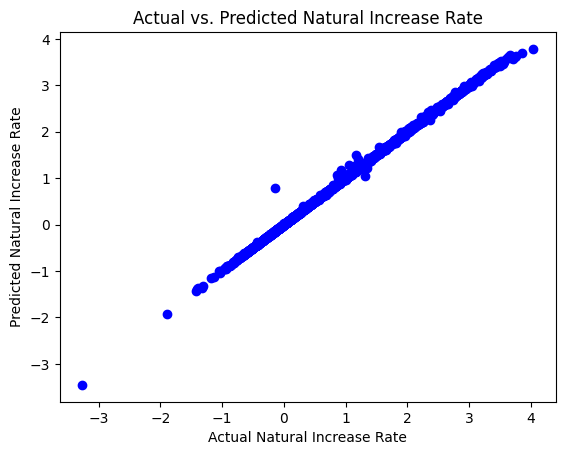

In [ ]:
#ploting the GRAPH

import matplotlib.pyplot as plt

# Assuming y_test is the actual natural increase rate and y_pred is the predicted natural increase rate
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Natural Increase Rate')
plt.ylabel('Predicted Natural Increase Rate')
plt.title('Actual vs. Predicted Natural Increase Rate')
plt.show()
